<a href="https://colab.research.google.com/github/michaelchapa/dataVisualization_NewYork_AirborneDiseases/blob/master/dataVisualization_NewYork_InfectiousDiseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Import data, Pre-Process DataFrames</h3>
<p>There are three datasets <code>measles, mumps, chickenpox</code>. Each with 40 years of monthly cases of the disease in New York city. They're loaded into DataFrames and will be our primary source for plotting throughout this Notebook.</p>
<p>Below is an example of the contents of each DataFrame:</p>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%% load data
months = ['January', 'February', 'March', 'April', 'May', 'June', 
           'July', 'August', 'September', 'October', 'November', 'December']

measles = pd.read_csv('https://raw.githubusercontent.com/michaelchapa/' \
                      'dataVisualization_NewYork_AirborneDiseases/master/' \
                      'Measles.csv', index_col = 0, names = months)
mumps = pd.read_csv('https://raw.githubusercontent.com/michaelchapa/' \
                    'dataVisualization_NewYork_AirborneDiseases/master/' \
                    'Mumps.csv', index_col = 0, names = months)

chickenpox = pd.read_csv('https://raw.githubusercontent.com/michaelchapa/' \
                         'dataVisualization_NewYork_AirborneDiseases/master/' \
                         'chickenPox.csv', index_col = 0, names = months)
chickenpox.sort_index(inplace = True) # Years are out of order, this sorts them.

print('Measles cases in New York from 1931 to 1971 by Month:\n', measles.head())

Measles cases in New York from 1931 to 1971 by Month:
       January  February  March  April  ...  September  October  November  December
1931      750      2010   4858   6172  ...         43       54        93       134
1932      146       270    621   1096  ...        118      149       594      1183
1933     1960      4699   9635   9573  ...         50       55        71       131
1934      133       168    431    652  ...         47       45        86       205
1935      508      1576   4357   6630  ...         67      136       333       555

[5 rows x 12 columns]


<h3>Bar Plot of each disease:</h3>
<p>From our BarPlot we can see there was a Measles epidemic in 1940</p>
<p>More info:<br> www.pubmed.ncbi.nlm.nih.gov/15406756/</p>
<p>Measles epidemic in the Mott Haven Health Center District, New York City, November, 1940-April, 1941</p>

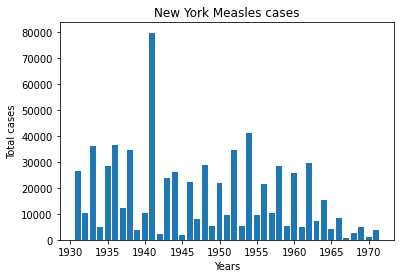

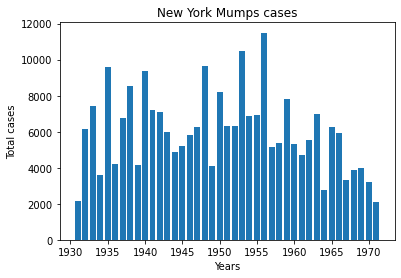

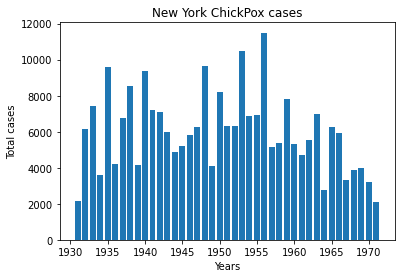

In [10]:
def plot_Line_Cases_Years(disease, diseaseName):
    years = disease.index.values
    totals = disease.sum(axis = 1)
    
    plt.figure()
    plt.title('New York ' + diseaseName + ' cases')
    plt.xlabel('Years')
    plt.ylabel('Total cases')
    plt.bar(years, totals)
    plt.show()

# bar Plots of each disease
plot_Line_Cases_Years(measles, 'Measles')
plot_Line_Cases_Years(mumps, 'Mumps')
plot_Line_Cases_Years(chickenpox, 'ChickPox')

<h3>Plot all Measles and Mumps cases:</h3>
<p>In 1963, John Enders and colleagues transformed their Edmonston-B strain of measles virus into a vaccine and licensed it in the United States.</p>
<p>We can observe a drop off in cases post 1963.</p>
<p><em>The Y-axis has been log-scaled to make the range less wide.</em></p>

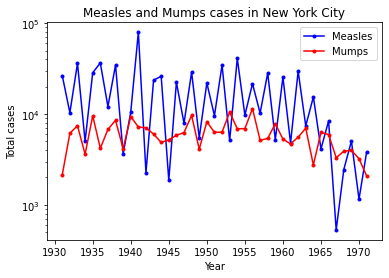

In [32]:
def plot_Line_Log_Cases_Years(disease1, disease2, names):
    years = disease1.index.values
    disease1Totals = disease1.sum(axis = 1)
    disease2Totals = disease2.sum(axis = 1)
    
    plt.figure()
    plt.title(names[0] + ' and ' + names[1] + ' cases in New York City')
    plt.xlabel('Year')
    plt.ylabel('Total cases')
    plt.yscale('log')
    plt.plot(years, disease1Totals, 'b.-', 
             years, disease2Totals, 'r.-')
    plt.legend(names)
    plt.show()

plot_Line_Log_Cases_Years(measles, mumps, ['Measles', 'Mumps'])

<h3>

<h3>Bar plot of cases by Month</h3>
<p>Averaging the cases by Month we observe: cases pickup in November and cases continue to rise through January as winter weather worsens. January through March the wind is the sharpest and there are the most snow-storms. April is still too cold to be comfortable outside. Late April you'll start to see Spring. May and June are the transition seasons to hotter weather. By July we observe the Measles cases are lower. Autumn shows the lowest cases and very favorable weather.</p>
<p><em>Chicken Pox is also plotted, we see a similar trend.</em></p>

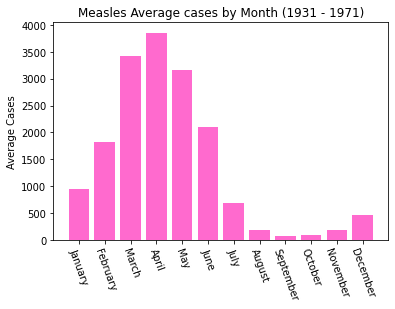

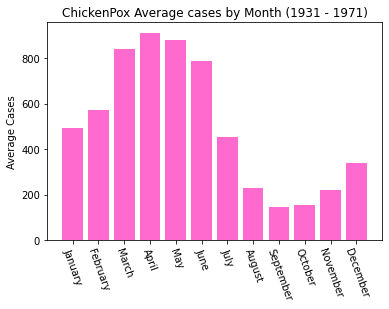

In [38]:
def plot_Bar_Cases_Month(disease, name):
    months = disease.columns.values
    monthAvgs = disease.mean()
    
    plt.figure()
    plt.title(name + ' Average cases by Month (1931 - 1971)')
    plt.ylabel('Average Cases')
    plt.bar(months, monthAvgs, color = '#FF6ACE')
    plt.xticks(months, rotation = -70)
    plt.show()

#%% Average number of mumps cases for each month of the year
plot_Bar_Cases_Month(measles, 'Measles')
plot_Bar_Cases_Month(chickenpox, 'ChickenPox')

<h3>Scatter Plot Measles cases against Mumps cases</h3>

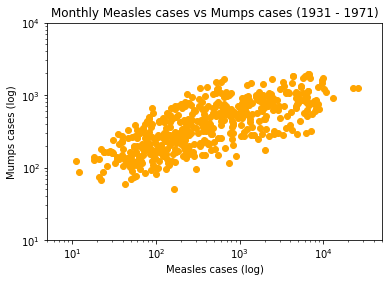

In [40]:
def plot_Scatter_Cases_Versus(disease1, disease2, names):
    label = ' cases (log)'
    plt.figure()
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Monthly ' + names[0] + ' cases vs ' + names[1] + ' cases ' \
              + '(1931 - 1971)')
    plt.xlabel(names[0] + label)
    plt.ylabel(names[1] + label)
    plt.axis([5, 10**4.7, 10, 10**4])
    plt.scatter(disease1, disease2, color = 'orange')
    plt.show()

#%% Log plot of Measles agains Mumps cases
plot_Scatter_Cases_Versus(measles, mumps, ['Measles', 'Mumps'])